##  **Initial analysis using one csv file**
####  *This is to understand the file structure and data.*

In [126]:
import pandas as pd

In [127]:
import datetime

today = datetime.date.today()

year = today.year

print(year)

2022


In [128]:
base_path = "/Users/leocyriac/Wesfarmers-OneDigital/tables"
state = "vic"
station_name = "breakwater_(geelong_racecourse)"
in_temperature = 20
data_path = base_path + "/" + state + "/" + station_name + "/"
data_path

'/Users/leocyriac/Wesfarmers-OneDigital/tables/vic/breakwater_(geelong_racecourse)/'

In [129]:
file_name = "breakwater_(geelong_racecourse)-202210.csv"
full_path = data_path + file_name
full_path

'/Users/leocyriac/Wesfarmers-OneDigital/tables/vic/breakwater_(geelong_racecourse)/breakwater_(geelong_racecourse)-202210.csv'

In [130]:
x = 0
with open(full_path, 'rb') as fp:
    x = len(fp.readlines())

print(f"Total Number of lines = {x} in file = {file_name}")

Total Number of lines = 25 in file = breakwater_(geelong_racecourse)-202210.csv


In [131]:
df = pd.read_csv(full_path, encoding='windows-1252', skiprows=12, skipfooter = 1, engine = 'python')
#df = pd.read_csv(full_path, encoding='windows-1252')
df.columns = ['station_name', 
              'date', 
              'evapo_transpiration_0000-2400', 
              'rain_0900-0900',
              'pan_evaporation_0900-0900',
              'maximum_temperature',
              'minimum_temperature',
              'maximum_relative_humidity',
              'minimum_relative_humidity',
              'average_10m_wind_wpeed',
              'solar_radiation']
df.head()

,station_name,date,evapo_transpiration_0000-2400,rain_0900-0900,pan_evaporation_0900-0900,maximum_temperature,minimum_temperature,maximum_relative_humidity,minimum_relative_humidity,average_10m_wind_wpeed,solar_radiation
0,BREAKWATER (GEELONG RACECOURSE),01/10/2022,3.1,0.0,,17.3,7.6,94,53,2.84,21.27
1,BREAKWATER (GEELONG RACECOURSE),02/10/2022,2.8,0.0,,17.3,3.8,100,56,1.88,21.27
2,BREAKWATER (GEELONG RACECOURSE),03/10/2022,3.0,0.0,,20.1,5.9,97,54,1.50,20.91
3,BREAKWATER (GEELONG RACECOURSE),04/10/2022,1.9,0.0,,14.6,8.9,97,61,3.27,9.26
4,BREAKWATER (GEELONG RACECOURSE),05/10/2022,1.6,0.0,,13.9,11.5,93,73,4.73,6.65


In [132]:
df_original = df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   station_name                   11 non-null     object 
 1   date                           11 non-null     object 
 2   evapo_transpiration_0000-2400  11 non-null     float64
 3   rain_0900-0900                 11 non-null     float64
 4   pan_evaporation_0900-0900      11 non-null     object 
 5   maximum_temperature            11 non-null     float64
 6   minimum_temperature            11 non-null     float64
 7   maximum_relative_humidity      11 non-null     int64  
 8   minimum_relative_humidity      11 non-null     int64  
 9   average_10m_wind_wpeed         11 non-null     float64
 10  solar_radiation                11 non-null     float64
dtypes: float64(6), int64(2), object(3)
memory usage: 1.1+ KB


#### Dropping columns that are not required

In [133]:
df.drop([ 'evapo_transpiration_0000-2400', 
          'rain_0900-0900',
          'pan_evaporation_0900-0900',
          'minimum_temperature',
          'maximum_relative_humidity',
          'minimum_relative_humidity',
          'average_10m_wind_wpeed',
          'solar_radiation'], axis = 1, inplace = True)

In [134]:
df.head()

,station_name,date,maximum_temperature
0,BREAKWATER (GEELONG RACECOURSE),01/10/2022,17.3
1,BREAKWATER (GEELONG RACECOURSE),02/10/2022,17.3
2,BREAKWATER (GEELONG RACECOURSE),03/10/2022,20.1
3,BREAKWATER (GEELONG RACECOURSE),04/10/2022,14.6
4,BREAKWATER (GEELONG RACECOURSE),05/10/2022,13.9


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   station_name         11 non-null     object 
 1   date                 11 non-null     object 
 2   maximum_temperature  11 non-null     float64
dtypes: float64(1), object(2)
memory usage: 392.0+ bytes


#### Converting "date" column from string to date type

In [136]:
df["date"] = pd.to_datetime(df["date"])
df.head()

,station_name,date,maximum_temperature
0,BREAKWATER (GEELONG RACECOURSE),2022-01-10,17.3
1,BREAKWATER (GEELONG RACECOURSE),2022-02-10,17.3
2,BREAKWATER (GEELONG RACECOURSE),2022-03-10,20.1
3,BREAKWATER (GEELONG RACECOURSE),2022-04-10,14.6
4,BREAKWATER (GEELONG RACECOURSE),2022-05-10,13.9


#### Addiing column "year" to do the aggregation

In [137]:
df['year'] = df['date'].dt.year
df.head()

,station_name,date,maximum_temperature,year
0,BREAKWATER (GEELONG RACECOURSE),2022-01-10,17.3,2022
1,BREAKWATER (GEELONG RACECOURSE),2022-02-10,17.3,2022
2,BREAKWATER (GEELONG RACECOURSE),2022-03-10,20.1,2022
3,BREAKWATER (GEELONG RACECOURSE),2022-04-10,14.6,2022
4,BREAKWATER (GEELONG RACECOURSE),2022-05-10,13.9,2022


#### Date column is not required anymore. So, dropping it.

In [138]:
df.drop([ 'date'], axis = 1, inplace = True)
df.head()

,station_name,maximum_temperature,year
0,BREAKWATER (GEELONG RACECOURSE),17.3,2022
1,BREAKWATER (GEELONG RACECOURSE),17.3,2022
2,BREAKWATER (GEELONG RACECOURSE),20.1,2022
3,BREAKWATER (GEELONG RACECOURSE),14.6,2022
4,BREAKWATER (GEELONG RACECOURSE),13.9,2022


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   station_name         11 non-null     object 
 1   maximum_temperature  11 non-null     float64
 2   year                 11 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 392.0+ bytes


In [140]:
df2 = df[(df["maximum_temperature"] > in_temperature) & (df["year"] > 2009)]
df2

,station_name,maximum_temperature,year
2,BREAKWATER (GEELONG RACECOURSE),20.1,2022
5,BREAKWATER (GEELONG RACECOURSE),21.1,2022
10,BREAKWATER (GEELONG RACECOURSE),21.1,2022


In [141]:
df2=df2.groupby(by=['station_name', 'year'], dropna=True).count()
df2.columns = ["count"]
df2.reset_index()

,station_name,year,count
0,BREAKWATER (GEELONG RACECOURSE),2022,3


##  **Analysis on how to do reconciliation**
####  *Two columns that has total values are considered for this analysis*

In [142]:
full_path = '/Users/leocyriac/Wesfarmers-OneDigital/tables/vic/moorabbin_airport/moorabbin_airport-200902.csv'
df = pd.read_csv(full_path, 
                 encoding='windows-1252', 
                 skiprows=12, 
                 usecols=['(mm)', '(mm).1'], 
                 #header = [1],
                 skip_blank_lines=True, 
                 engine='python')
df['(mm)'] = pd.to_numeric(df['(mm)'], errors='coerce').fillna(0)
df['(mm).1'] = pd.to_numeric(df['(mm).1'], errors='coerce').fillna(0)
df.columns
#calculated_sum_transpiration = df.sum().round(2)[0]
#calculated_sum_rain = df.sum().round(2)[1]
#
#sum_transpiration = df.iloc[-1,0]
#sum_rain = df.iloc[-1,1]
#
#print(calculated_sum_transpiration)
#print(sum_transpiration)
#
#if (calculated_sum_transpiration - sum_transpiration) == sum_transpiration:
#    print("Matches")
#else:
#    print("Doesn't match")

Index(['(mm)', '(mm).1'], dtype='object')

##  **Processing All CSV Files**
####  *This will be used to design the code*

#### First step is to get all required configuration parameters.

In [143]:
# Import libraries
import glob
import pandas as pd

# Get CSV files list from a folder
base_path = "/Users/leocyriac/Wesfarmers-OneDigital/tables"
#state = "vic"
#station_name = "breakwater_(geelong_racecourse)"
station_suburb_dict = {"BELMONT": base_path + "/wa/perth_metro/*.csv",
                       "GEELONG": base_path + "/vic/breakwater_(geelong_racecourse)/*.csv",
                       "NOTTING HILL": base_path + "/vic/moorabbin_airport/*.csv"
                      }
in_temperature = 35

station_suburb_dict
#data_path = base_path + "/" + state + "/" + station_name
#csv_files = glob.glob(data_path + "/*.csv")
#data_path


{'BELMONT': '/Users/leocyriac/Wesfarmers-OneDigital/tables/wa/perth_metro/*.csv',
 'GEELONG': '/Users/leocyriac/Wesfarmers-OneDigital/tables/vic/breakwater_(geelong_racecourse)/*.csv',
 'NOTTING HILL': '/Users/leocyriac/Wesfarmers-OneDigital/tables/vic/moorabbin_airport/*.csv'}

In [144]:
for locality, path in station_suburb_dict.items():
    print(f"locality - {locality}, path - {path}")

locality - BELMONT, path - /Users/leocyriac/Wesfarmers-OneDigital/tables/wa/perth_metro/*.csv
locality - GEELONG, path - /Users/leocyriac/Wesfarmers-OneDigital/tables/vic/breakwater_(geelong_racecourse)/*.csv
locality - NOTTING HILL, path - /Users/leocyriac/Wesfarmers-OneDigital/tables/vic/moorabbin_airport/*.csv


#### Going through each folder, reading each file using python's native file processing.
#### Goal is to use this data for unit testing.

In [145]:
for locality, path in station_suburb_dict.items():
    print("---------------------------------------------------------------------------------")
    print(f"Processing files for locality : {locality}")
    print("---------------------------------------------------------------------------------")
    
    csv_files = glob.glob(path)
    
    file_count = len(csv_files)
    total_lines = 0
    for file in csv_files:
        csv_name = file.split("/")[-1]
        x = 0
        with open(file, 'rb') as fp:
            x = len(fp.readlines())

        print(f"{csv_name} : {x}")
        total_lines = total_lines + x

    print(f"Total Number of files = {file_count}, lines = {total_lines}")

---------------------------------------------------------------------------------
Processing files for locality : BELMONT
---------------------------------------------------------------------------------
perth_metro-202210.csv : 25
perth_metro-202204.csv : 44
perth_metro-201902.csv : 42
perth_metro-202012.csv : 45
perth_metro-202006.csv : 44
perth_metro-201309.csv : 44
perth_metro-201308.csv : 45
perth_metro-202007.csv : 45
perth_metro-201903.csv : 45
perth_metro-202205.csv : 45
perth_metro-202207.csv : 45
perth_metro-201901.csv : 45
perth_metro-202005.csv : 45
perth_metro-202011.csv : 44
perth_metro-201108.csv : 45
perth_metro-201109.csv : 44
perth_metro-202010.csv : 45
perth_metro-202004.csv : 44
perth_metro-202206.csv : 44
perth_metro-202202.csv : 42
perth_metro-201910.csv : 45
perth_metro-201904.csv : 44
perth_metro-201509.csv : 44
perth_metro-202001.csv : 45
perth_metro-201508.csv : 45
perth_metro-201905.csv : 45
perth_metro-201911.csv : 44
perth_metro-202203.csv : 45
perth_metro-

breakwater_(geelong_racecourse)-201707.csv : 45
breakwater_(geelong_racecourse)-201712.csv : 40
breakwater_(geelong_racecourse)-201706.csv : 44
breakwater_(geelong_racecourse)-201909.csv : 44
breakwater_(geelong_racecourse)-201510.csv : 45
breakwater_(geelong_racecourse)-201504.csv : 44
breakwater_(geelong_racecourse)-201302.csv : 42
breakwater_(geelong_racecourse)-201110.csv : 45
breakwater_(geelong_racecourse)-201312.csv : 45
breakwater_(geelong_racecourse)-201306.csv : 44
breakwater_(geelong_racecourse)-202009.csv : 44
breakwater_(geelong_racecourse)-201702.csv : 42
breakwater_(geelong_racecourse)-201703.csv : 45
breakwater_(geelong_racecourse)-202008.csv : 45
breakwater_(geelong_racecourse)-201501.csv : 45
breakwater_(geelong_racecourse)-201307.csv : 45
breakwater_(geelong_racecourse)-201111.csv : 44
breakwater_(geelong_racecourse)-201107.csv : 45
breakwater_(geelong_racecourse)-201305.csv : 45
breakwater_(geelong_racecourse)-201311.csv : 44
breakwater_(geelong_racecourse)-201503.c

#### Going through each folder, reading each CSV file using pandas and creating one big dataframe with all this data.

In [146]:
localities_df_list = []
all_localities_df = pd.DataFrame()
for locality, path in station_suburb_dict.items():
    print("---------------------------------------------------------------------------------")
    print(f"Processing files for locality : {locality}")
    print("---------------------------------------------------------------------------------")

    csv_files = glob.glob(path)
    #print(type(csv_files))
    # Read each CSV file into DataFrame
    # This creates a list of dataframes
    df_list = (pd.read_csv(csv_file, encoding='windows-1252', skiprows=12, skipfooter = 1, engine = 'python') for csv_file in csv_files)
    print(type(df_list))
    #localities_df_list.append(df_list)
    # Concatenate all DataFrames
    big_df   = pd.concat(df_list, ignore_index=True)
    big_df["locality_name"] = locality
    print(f"shape = {big_df.shape}")
    all_localities_df = pd.concat([all_localities_df, big_df], ignore_index=True)

all_localities_df.shape


---------------------------------------------------------------------------------
Processing files for locality : BELMONT
---------------------------------------------------------------------------------
<class 'generator'>
shape = (5027, 12)
---------------------------------------------------------------------------------
Processing files for locality : GEELONG
---------------------------------------------------------------------------------
<class 'generator'>
shape = (4146, 12)
---------------------------------------------------------------------------------
Processing files for locality : NOTTING HILL
---------------------------------------------------------------------------------
<class 'generator'>
shape = (5027, 12)


(14200, 12)

In [147]:
all_localities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14200 entries, 0 to 14199
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     14200 non-null  object
 1   Unnamed: 1     14200 non-null  object
 2   (mm)           14200 non-null  object
 3   (mm).1         14200 non-null  object
 4   (mm).2         14200 non-null  object
 5   (°C)           14200 non-null  object
 6   (°C).1         14200 non-null  object
 7   (%)            14200 non-null  object
 8   (%).1          14200 non-null  object
 9   (m/sec)        14200 non-null  object
 10  (MJ/sq m)      14200 non-null  object
 11  locality_name  14200 non-null  object
dtypes: object(12)
memory usage: 1.3+ MB


In [148]:
big_df = all_localities_df
big_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14200 entries, 0 to 14199
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     14200 non-null  object
 1   Unnamed: 1     14200 non-null  object
 2   (mm)           14200 non-null  object
 3   (mm).1         14200 non-null  object
 4   (mm).2         14200 non-null  object
 5   (°C)           14200 non-null  object
 6   (°C).1         14200 non-null  object
 7   (%)            14200 non-null  object
 8   (%).1          14200 non-null  object
 9   (m/sec)        14200 non-null  object
 10  (MJ/sq m)      14200 non-null  object
 11  locality_name  14200 non-null  object
dtypes: object(12)
memory usage: 1.3+ MB


#### Renaming columns

In [149]:
big_df.columns = ['station_name', 
              'date', 
              'evapo_transpiration_0000-2400', 
              'rain_0900-0900',
              'pan_evaporation_0900-0900',
              'maximum_temperature',
              'minimum_temperature',
              'maximum_relative_humidity',
              'minimum_relative_humidity',
              'average_10m_wind_wpeed',
              'solar_radiation',
              'locality_name']
big_df.head()

,station_name,date,evapo_transpiration_0000-2400,rain_0900-0900,pan_evaporation_0900-0900,maximum_temperature,minimum_temperature,maximum_relative_humidity,minimum_relative_humidity,average_10m_wind_wpeed,solar_radiation,locality_name
0,PERTH METRO,01/10/2022,5.6,0.0,,26.7,13.7,69,25,3.47,23.18,BELMONT
1,PERTH METRO,02/10/2022,4.4,0.0,,22.6,12.5,72,38,3.48,20.28,BELMONT
2,PERTH METRO,03/10/2022,3.8,0.0,,21.7,11.5,84,38,2.54,19.55,BELMONT
3,PERTH METRO,04/10/2022,5.1,0.0,,26.0,10.4,79,28,3.02,23.98,BELMONT
4,PERTH METRO,05/10/2022,3.4,6.4,,19.2,14.8,99,49,3.97,17.51,BELMONT


In [150]:
big_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14200 entries, 0 to 14199
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   station_name                   14200 non-null  object
 1   date                           14200 non-null  object
 2   evapo_transpiration_0000-2400  14200 non-null  object
 3   rain_0900-0900                 14200 non-null  object
 4   pan_evaporation_0900-0900      14200 non-null  object
 5   maximum_temperature            14200 non-null  object
 6   minimum_temperature            14200 non-null  object
 7   maximum_relative_humidity      14200 non-null  object
 8   minimum_relative_humidity      14200 non-null  object
 9   average_10m_wind_wpeed         14200 non-null  object
 10  solar_radiation                14200 non-null  object
 11  locality_name                  14200 non-null  object
dtypes: object(12)
memory usage: 1.3+ MB


In [151]:
big_df_original = big_df.copy()
big_df_original

,station_name,date,evapo_transpiration_0000-2400,rain_0900-0900,pan_evaporation_0900-0900,maximum_temperature,minimum_temperature,maximum_relative_humidity,minimum_relative_humidity,average_10m_wind_wpeed,solar_radiation,locality_name
0,PERTH METRO,01/10/2022,5.6,0.0,,26.7,13.7,69,25,3.47,23.18,BELMONT
1,PERTH METRO,02/10/2022,4.4,0.0,,22.6,12.5,72,38,3.48,20.28,BELMONT
2,PERTH METRO,03/10/2022,3.8,0.0,,21.7,11.5,84,38,2.54,19.55,BELMONT
3,PERTH METRO,04/10/2022,5.1,0.0,,26.0,10.4,79,28,3.02,23.98,BELMONT
4,PERTH METRO,05/10/2022,3.4,6.4,,19.2,14.8,99,49,3.97,17.51,BELMONT
...,...,...,...,...,...,...,...,...,...,...,...,...
14195,MOORABBIN AIRPORT,26/09/2010,3.2,0.0,,19.3,8.6,94,52,3.36,19.86,NOTTING HILL
14196,MOORABBIN AIRPORT,27/09/2010,2.6,0.0,,16.6,11.7,94,56,5.58,10.95,NOTTING HILL
14197,MOORABBIN AIRPORT,28/09/2010,3.2,3.0,,13.4,7.8,75,52,5.97,19.10,NOTTING HILL
14198,MOORABBIN AIRPORT,29/09/2010,2.9,6.0,,13.0,5.9,89,51,5.27,21.28,NOTTING HILL


#### Dropping columns that are not required

In [152]:
big_df.drop([ 'station_name',
          'evapo_transpiration_0000-2400', 
          'rain_0900-0900',
          'pan_evaporation_0900-0900',
          'minimum_temperature',
          'maximum_relative_humidity',
          'minimum_relative_humidity',
          'average_10m_wind_wpeed',
          'solar_radiation'], axis = 1, inplace = True)
big_df.head(20)

,date,maximum_temperature,locality_name
0,01/10/2022,26.7,BELMONT
1,02/10/2022,22.6,BELMONT
2,03/10/2022,21.7,BELMONT
3,04/10/2022,26.0,BELMONT
4,05/10/2022,19.2,BELMONT
5,06/10/2022,19.4,BELMONT
6,07/10/2022,20.7,BELMONT
7,08/10/2022,24.6,BELMONT
8,09/10/2022,21.7,BELMONT
9,10/10/2022,18.5,BELMONT


In [153]:
big_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14200 entries, 0 to 14199
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   date                 14200 non-null  object
 1   maximum_temperature  14200 non-null  object
 2   locality_name        14200 non-null  object
dtypes: object(3)
memory usage: 332.9+ KB


#### Data type conversion for columns "date" and "maximum_temperature"

In [154]:
#missing values (or filled with space) in maximum_temperature field
#big_df["maximum_temperature"] = big_df["maximum_temperature"].fillna(0)
#Mixed format in date field
#big_df["date"] = pd.to_datetime(big_df["date"], format='%d/%m/%Y')
big_df["date"] = pd.to_datetime(big_df["date"])
#to deal with missing values errors='coerce' is used. This will fill those can't be converted to NaN
big_df["maximum_temperature"] = pd.to_numeric(big_df["maximum_temperature"],errors='coerce')
big_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14200 entries, 0 to 14199
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 14200 non-null  datetime64[ns]
 1   maximum_temperature  14120 non-null  float64       
 2   locality_name        14200 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 332.9+ KB


/var/folders/h5/5b12vwv1339cz3wf573bwptc0000gn/T/ipykernel_40962/2804262940.py:5: UserWarning: Parsing '13/04/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  big_df["date"] = pd.to_datetime(big_df["date"])
/var/folders/h5/5b12vwv1339cz3wf573bwptc0000gn/T/ipykernel_40962/2804262940.py:5: UserWarning: Parsing '14/04/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  big_df["date"] = pd.to_datetime(big_df["date"])
/var/folders/h5/5b12vwv1339cz3wf573bwptc0000gn/T/ipykernel_40962/2804262940.py:5: UserWarning: Parsing '15/04/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  big_df["date"] = pd.to_datetime(big_df["date"])
/var/folders/h5/5b12vwv1339cz3wf573bwptc0000gn/T/ipykernel_40962/2804262940.py:5: UserWarning: Parsing '16/04/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent

In [155]:
big_df[big_df['maximum_temperature'].isna()]

,date,maximum_temperature,locality_name
13,2022-03-04,NaN,BELMONT
24,2022-04-14,NaN,BELMONT
70,2020-02-12,NaN,BELMONT
109,2020-10-06,NaN,BELMONT
191,2020-01-07,NaN,BELMONT
...,...,...,...
10502,2016-07-21,NaN,NOTTING HILL
10824,2015-08-03,NaN,NOTTING HILL
10825,2015-09-03,NaN,NOTTING HILL
12519,2019-07-10,NaN,NOTTING HILL


In [156]:
big_df["maximum_temperature"] = big_df["maximum_temperature"].fillna(0)
big_df[big_df["maximum_temperature"] == 0]

,date,maximum_temperature,locality_name
13,2022-03-04,0.0,BELMONT
24,2022-04-14,0.0,BELMONT
70,2020-02-12,0.0,BELMONT
109,2020-10-06,0.0,BELMONT
191,2020-01-07,0.0,BELMONT
...,...,...,...
10502,2016-07-21,0.0,NOTTING HILL
10824,2015-08-03,0.0,NOTTING HILL
10825,2015-09-03,0.0,NOTTING HILL
12519,2019-07-10,0.0,NOTTING HILL


In [157]:
big_df['year'] = big_df['date'].dt.year
big_df.head()

,date,maximum_temperature,locality_name,year
0,2022-01-10,26.7,BELMONT,2022
1,2022-02-10,22.6,BELMONT,2022
2,2022-03-10,21.7,BELMONT,2022
3,2022-04-10,26.0,BELMONT,2022
4,2022-05-10,19.2,BELMONT,2022


In [158]:
big_df.drop([ 'date'], axis = 1, inplace = True)
big_df.head()

,maximum_temperature,locality_name,year
0,26.7,BELMONT,2022
1,22.6,BELMONT,2022
2,21.7,BELMONT,2022
3,26.0,BELMONT,2022
4,19.2,BELMONT,2022


In [159]:
df2 = big_df[big_df.maximum_temperature > in_temperature]
df2

,maximum_temperature,locality_name,year
41,38.5,BELMONT,2019
46,36.0,BELMONT,2019
47,35.5,BELMONT,2019
50,35.9,BELMONT,2019
65,37.0,BELMONT,2019
...,...,...,...
13961,42.3,NOTTING HILL,2018
13966,35.3,NOTTING HILL,2018
13973,39.8,NOTTING HILL,2018
13974,41.9,NOTTING HILL,2018


In [160]:
final_df=df2.groupby(by=['locality_name', 'year'], dropna=True).count()
final_df.columns = ["count"]
final_df.reset_index()

,locality_name,year,count
0,BELMONT,2009,33
1,BELMONT,2010,33
2,BELMONT,2011,38
3,BELMONT,2012,39
4,BELMONT,2013,31
5,BELMONT,2014,26
6,BELMONT,2015,24
7,BELMONT,2016,27
8,BELMONT,2017,27
9,BELMONT,2018,14


In [161]:
# Libraries to help with data visualization

import seaborn as sns
import matplotlib.pyplot as plt
plot_df = final_df.reset_index()
plot_df

,locality_name,year,count
0,BELMONT,2009,33
1,BELMONT,2010,33
2,BELMONT,2011,38
3,BELMONT,2012,39
4,BELMONT,2013,31
5,BELMONT,2014,26
6,BELMONT,2015,24
7,BELMONT,2016,27
8,BELMONT,2017,27
9,BELMONT,2018,14


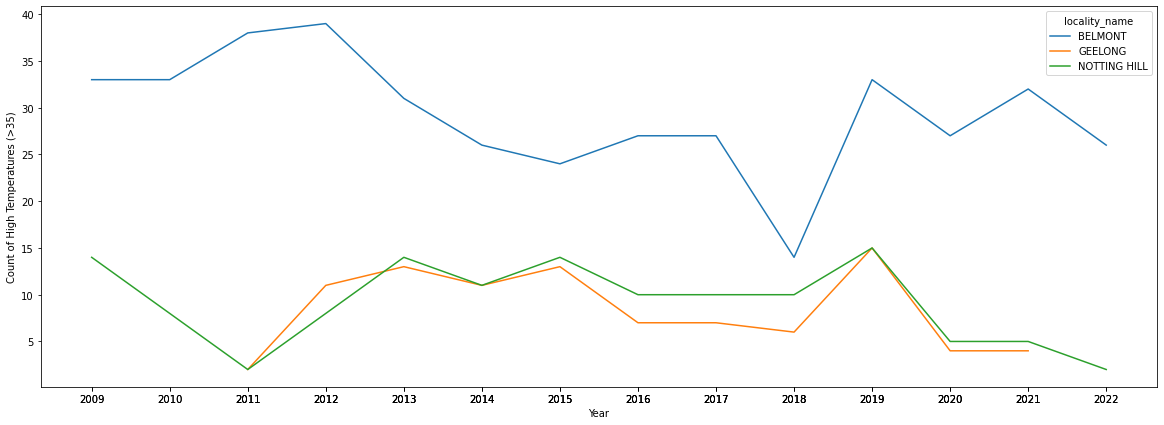

In [162]:
plt.figure(figsize = (20, 7))

xticks = plot_df.year.tolist()
#yticks = plot_df["count"].tolist()
sns.lineplot(x = "year", y = "count", ci = 0, data = plot_df, hue = 'locality_name')

plt.xticks(xticks, xticks)
#plt.yticks(yticks, yticks)

plt.ylabel(f'Count of High Temperatures (>{in_temperature})')

plt.xlabel('Year')

plt.show()

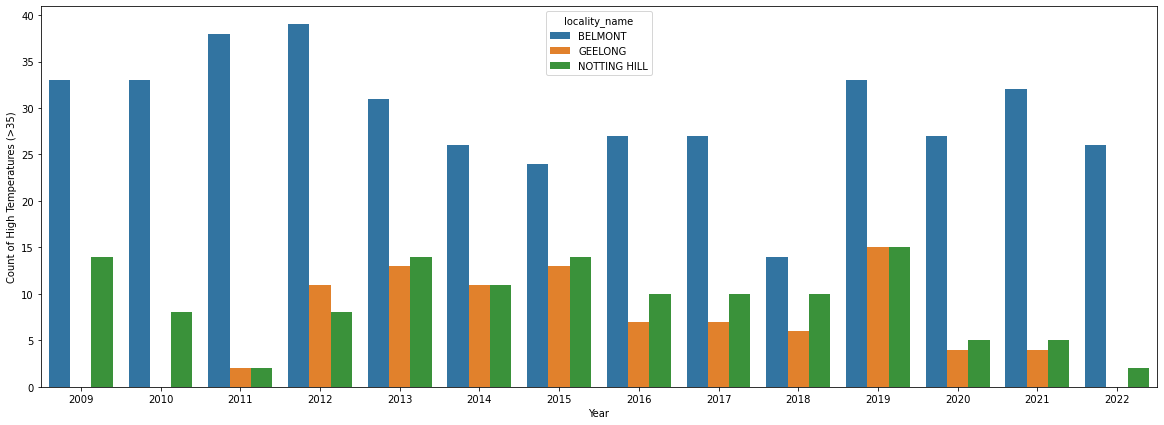

In [163]:
#barplot
plt.figure(figsize = (20, 7))
sns.barplot(x = 'year',
            y = 'count',
            hue = 'locality_name',
            data = plot_df)

plt.ylabel(f'Count of High Temperatures (>{in_temperature})')

plt.xlabel('Year')
# Show the plot
plt.show()

In [164]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [165]:
import geopy

#### Testing with the geocoder ArcGIS

In [166]:
from geopy.geocoders import ArcGIS

In [167]:
nom = ArcGIS()
location=nom.geocode("Bunnings Notting Hill, 232-256 Ferntree Gully Rd, Notting Hill VIC 3168",timeout=180)
print("The latitude of the location is: ", location.latitude)
print("The longitude of the location is: ", location.longitude)

The latitude of the location is:  -37.899713519913945
The longitude of the location is:  145.1274678507482


In [168]:
# Latitude & Longitude input
coordinates = "-37.899713519913945 , 145.1274678507482"

location = nom.reverse(coordinates)

#address = location.raw['address']
print(location)

232 Ferntree Gully Rd, Melbourne, Victoria 3168, AUS


#### Conclusion - This geocoder is working as expected.

#### Testing with geocoder Nominatim

In [171]:
# Import the required library
from geopy.geocoders import Nominatim

# Initialize Nominatim API
geolocator = Nominatim(user_agent="MyApp")

location = geolocator.geocode("Bunnings Notting Hill, 232-256 Ferntree Gully Rd, Notting Hill VIC 3168")

print("The latitude of the location is: ", location.latitude)
print("The longitude of the location is: ", location.longitude)

AttributeError: 'NoneType' object has no attribute 'latitude'

In [173]:
from geopy.geocoders import Nominatim

# Initialize Nominatim API
geolocator = Nominatim(user_agent="MyApp")

# Latitude & Longitude input
coordinates = "-38.1485692 , 144.3639645"

location = geolocator.reverse(coordinates)

address = location.raw['address']
print(address)

{'shop': 'Officeworks', 'house_number': '150', 'road': 'Malop Street', 'city': 'Geelong CBD', 'municipality': 'City of Greater Geelong', 'state': 'Victoria', 'ISO3166-2-lvl4': 'AU-VIC', 'postcode': '3220', 'country': 'Australia', 'country_code': 'au'}


#### Conclusion - This geocoder isn't working as expected. Though it works for other two addresses, this address isn't working

#### Testing how to find distance if two lat, long values are given

In [174]:
from geopy.distance import geodesic

coords_1 = (-37.901090, 145.140810) #Bunnings Notting Hill, 232-256 Ferntree Gully Rd, Notting Hill VIC 3168
coords_2 = (-38.148410, 144.364410) #Officeworks Geelong, 150 Malop St, Geelong VIC 3220

print(geodesic(coords_1, coords_2))

73.4896439675216 km


#### Validating if the distance calculated by geodesic and the python math library functions are same

In [175]:
# Python 3 program to calculate Distance Between Two Points on Earth
from math import radians, cos, sin, asin, sqrt
def distance(lat1, lat2, lon1, lon2):
	
	# The math module contains a function named
	# radians which converts from degrees to radians.
	lon1 = radians(lon1)
	lon2 = radians(lon2)
	lat1 = radians(lat1)
	lat2 = radians(lat2)
	
	# Haversine formula
	dlon = lon2 - lon1
	dlat = lat2 - lat1
	a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2

	c = 2 * asin(sqrt(a))
	
	# Radius of earth in kilometers. Use 3956 for miles
	r = 6371
	
	# calculate the result
	return(c * r)
	
	
# driver code
lat1 = -37.901090
lat2 = -38.148410
lon1 = 145.140810
lon2 = 144.364410
print(distance(lat1, lat2, lon1, lon2), "K.M")

73.35697556226557 K.M


#### Conclusion: They look almost same.

### Code to find out distance between given addresses and weather stations

In [176]:
# Import the required library
from geopy.geocoders import ArcGIS
from geopy.distance import geodesic

#### API call failure for ArcGIS can be resolved by following the steps mentioned in - https://stackoverflow.com/questions/50236117/scraping-ssl-certificate-verify-failed-error-for-http-en-wikipedia-org
#### ArcGIS documentation - https://geopy.readthedocs.io/en/stable/#arcgis

In [177]:
# Initialise ArcGIS object
geolocator = ArcGIS()

store_addresses_dict = {"BELMONT" : "Bunnings Notting Hill, 232 Ferntree Gully Rd, Notting Hill VIC 3168",
                   "GEELONG" : "Officeworks Geelong, 150 Malop St, Geelong VIC 3220",
                   "NOTTING HILL" : "Kmart Belmont, Belmont Ave, Belmont WA 6104"
                  }
store_addresses_dict

{'BELMONT': 'Bunnings Notting Hill, 232 Ferntree Gully Rd, Notting Hill VIC 3168',
 'GEELONG': 'Officeworks Geelong, 150 Malop St, Geelong VIC 3220',
 'NOTTING HILL': 'Kmart Belmont, Belmont Ave, Belmont WA 6104'}

#### Testing to see if we are able to get lat, long for all addresses

In [178]:
location_lat_longs_dict = {}
for suburb, address in store_addresses_dict.items():
    location = geolocator.geocode(address)
    location_lat_longs_dict[suburb] = location

for suburb, lat_long in location_lat_longs_dict.items():
    print("The latitude of the location is: ", lat_long.latitude)
    print("The longitude of the location is: ", lat_long.longitude)
location_lat_longs_dict

The latitude of the location is:  -37.899713519913945
The longitude of the location is:  145.1274678507482
The latitude of the location is:  -38.14823999999993
The longitude of the location is:  144.36396000000002
The latitude of the location is:  -31.965709999999945
The longitude of the location is:  115.9344000000001


{'BELMONT': Location(232 Ferntree Gully Rd, Clayton, Melbourne, Victoria, 3168, (-37.899713519913945, 145.1274678507482, 0.0)),
 'GEELONG': Location(Officeworks, (-38.14823999999993, 144.36396000000002, 0.0)),
 'NOTTING HILL': Location(Kmart-Belmont Forum, (-31.965709999999945, 115.9344000000001, 0.0))}

In [179]:
import pandas as pd

#### Loading the stations_db.txt which contains the weather stations and their lat, long data
#### This file has got fixed width columns with no headers

In [180]:
base_path = "/Users/leocyriac/Wesfarmers-OneDigital/tables"
stations_file = base_path + "/stations_db.txt"

cols = ['id1','state','id2','station_name', 'some_date', 'latitude', 'longitude']
df_stations = pd.read_fwf(stations_file, 
                 header=None,
                 widths=[8,4,6,41, 16, 9, 10],
                 names=cols)
df_stations

,id1,state,id2,station_name,some_date,latitude,longitude
0,15590,NT,15B,ALICE SPRINGS AIRPORT,19400101..,-23.7951,133.8890
1,14272,NT,14GA,BATCHELOR AIRPORT,19920813..,-13.0544,131.0252
2,14723,NT,14DE,BORROLOOLA AIRPORT,19871107..,-16.0755,136.3041
3,14954,NT,14F,BRADSHAW,19980529..,-14.9408,130.8091
4,14808,NT,14F,BRADSHAW - ANGALLARI VALLEY (DEFENCE),20171206..,-15.4397,130.5731
...,...,...,...,...,...,...,...
506,10917,WA,10A,WANDERING,19981214..,-32.6722,116.6706
507,13011,WA,13,WARBURTON AIRFIELD,19400101..,-26.1317,126.5839
508,13044,WA,13,WILUNA AERO,20171102..,-26.6273,120.2195
509,1006,WA,01,WYNDHAM AERO,19510101..,-15.5100,128.1503


In [181]:
df_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id1           511 non-null    int64  
 1   state         511 non-null    object 
 2   id2           511 non-null    object 
 3   station_name  511 non-null    object 
 4   some_date     511 non-null    object 
 5   latitude      511 non-null    float64
 6   longitude     511 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.1+ KB


In [182]:
df_stations['station_lat_long'] = df_stations['latitude'].astype(str) + ',' + df_stations['longitude'].astype(str)
df_stations

,id1,state,id2,station_name,some_date,latitude,longitude,station_lat_long
0,15590,NT,15B,ALICE SPRINGS AIRPORT,19400101..,-23.7951,133.8890,"-23.7951,133.889"
1,14272,NT,14GA,BATCHELOR AIRPORT,19920813..,-13.0544,131.0252,"-13.0544,131.0252"
2,14723,NT,14DE,BORROLOOLA AIRPORT,19871107..,-16.0755,136.3041,"-16.0755,136.3041"
3,14954,NT,14F,BRADSHAW,19980529..,-14.9408,130.8091,"-14.9408,130.8091"
4,14808,NT,14F,BRADSHAW - ANGALLARI VALLEY (DEFENCE),20171206..,-15.4397,130.5731,"-15.4397,130.5731"
...,...,...,...,...,...,...,...,...
506,10917,WA,10A,WANDERING,19981214..,-32.6722,116.6706,"-32.6722,116.6706"
507,13011,WA,13,WARBURTON AIRFIELD,19400101..,-26.1317,126.5839,"-26.1317,126.5839"
508,13044,WA,13,WILUNA AERO,20171102..,-26.6273,120.2195,"-26.6273,120.2195"
509,1006,WA,01,WYNDHAM AERO,19510101..,-15.5100,128.1503,"-15.51,128.1503"


In [183]:
df_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id1               511 non-null    int64  
 1   state             511 non-null    object 
 2   id2               511 non-null    object 
 3   station_name      511 non-null    object 
 4   some_date         511 non-null    object 
 5   latitude          511 non-null    float64
 6   longitude         511 non-null    float64
 7   station_lat_long  511 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.1+ KB


In [184]:
#station_suburb_dict = {"BELMONT": base_path + "/wa/perth_metro/*.csv",
#                       "GEELONG": base_path + "/vic/breakwater_(geelong_racecourse)/*.csv",
#                       "NOTTING HILL": base_path + "/vic/moorabbin_airport/*.csv"
#                      }

station_suburb_dict = {}
for suburb, lat_long in location_lat_longs_dict.items():
    coords_1 = (lat_long.latitude, lat_long.longitude)
    df_stations[suburb.lower() + '_dist'] = df_stations["station_lat_long"].apply(lambda coords_2: str(geodesic(coords_1, coords_2)).split()[0])
    df_stations[suburb.lower() + '_dist'] = pd.to_numeric(df_stations[suburb.lower() + '_dist'])
    min_dist_df = df_stations[df_stations[suburb.lower() + '_dist'] == df_stations[suburb.lower() + '_dist'].min()]
    #print(min_dist_df)
    state = min_dist_df.iloc[0,1].lower()
    station_name = min_dist_df.iloc[0,3].lower().replace(" ", "_")
    station_suburb_dict[suburb] = base_path + "/" + state + "/" + station_name + "/*.csv"
    
print(station_suburb_dict)
df_stations

{'BELMONT': '/Users/leocyriac/Wesfarmers-OneDigital/tables/vic/moorabbin_airport/*.csv', 'GEELONG': '/Users/leocyriac/Wesfarmers-OneDigital/tables/vic/breakwater_(geelong_racecourse)/*.csv', 'NOTTING HILL': '/Users/leocyriac/Wesfarmers-OneDigital/tables/wa/perth_airport/*.csv'}


,id1,state,id2,station_name,some_date,latitude,longitude,station_lat_long,belmont_dist,geelong_dist,notting hill_dist
0,15590,NT,15B,ALICE SPRINGS AIRPORT,19400101..,-23.7951,133.8890,"-23.7951,133.889",1894.191335,1876.736103,1982.486306
1,14272,NT,14GA,BATCHELOR AIRPORT,19920813..,-13.0544,131.0252,"-13.0544,131.0252",3087.498379,3078.087709,2600.312994
2,14723,NT,14DE,BORROLOOLA AIRPORT,19871107..,-16.0755,136.3041,"-16.0755,136.3041",2568.797938,2570.402418,2709.356373
3,14954,NT,14F,BRADSHAW,19980529..,-14.9408,130.8091,"-14.9408,130.8091",2908.925160,2896.821125,2415.932207
4,14808,NT,14F,BRADSHAW - ANGALLARI VALLEY (DEFENCE),20171206..,-15.4397,130.5731,"-15.4397,130.5731",2871.039758,2857.731691,2356.427483
...,...,...,...,...,...,...,...,...,...,...,...
506,10917,WA,10A,WANDERING,19981214..,-32.6722,116.6706,"-32.6722,116.6706",2641.870707,2577.261221,104.611183
507,13011,WA,13,WARBURTON AIRFIELD,19400101..,-26.1317,126.5839,"-26.1317,126.5839",2177.394974,2135.580456,1221.212915
508,13044,WA,13,WILUNA AERO,20171102..,-26.6273,120.2195,"-26.6273,120.2195",2646.920667,2594.762640,723.326495
509,1006,WA,01,WYNDHAM AERO,19510101..,-15.5100,128.1503,"-15.51,128.1503",2990.092734,2970.955002,2203.491868


In [185]:
df_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id1                511 non-null    int64  
 1   state              511 non-null    object 
 2   id2                511 non-null    object 
 3   station_name       511 non-null    object 
 4   some_date          511 non-null    object 
 5   latitude           511 non-null    float64
 6   longitude          511 non-null    float64
 7   station_lat_long   511 non-null    object 
 8   belmont_dist       511 non-null    float64
 9   geelong_dist       511 non-null    float64
 10  notting hill_dist  511 non-null    float64
dtypes: float64(5), int64(1), object(5)
memory usage: 44.0+ KB


In [186]:
df_stations[df_stations.belmont_dist == df_stations.belmont_dist.min()]

,id1,state,id2,station_name,some_date,latitude,longitude,station_lat_long,belmont_dist,geelong_dist,notting hill_dist
143,86077,VIC,86,MOORABBIN AIRPORT,19500704..,-37.98,145.0962,"-37.98,145.0962",9.325672,66.916666,2733.060314
